In [1]:
from map_generator import MapGenerator
import matplotlib.pyplot as plt
from Planners.abc.abc_problem import ABCProblem
from Planners.pso.pso_problem import PSOProblem
from Planners.gwo.gwo_problem import GWOProblem
from Planners.helper import linear_interpolation, cost_func
import numpy as np
from IPython.display import display, clear_output
import os

custom_map_1_params.yaml


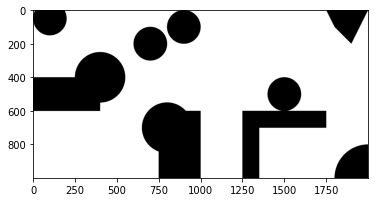

map_001_params.yaml


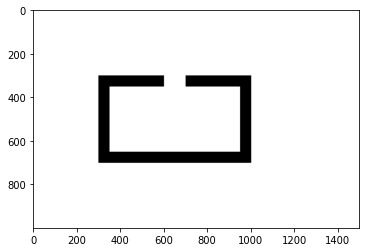

map_002_params.yaml


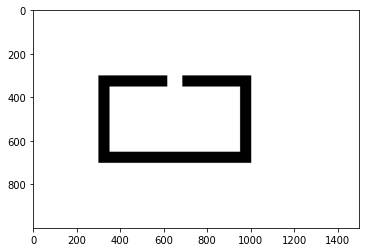

map_003_params.yaml


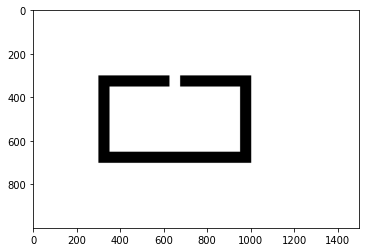

map_004_params.yaml


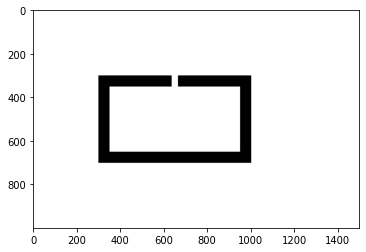

map_005_params.yaml


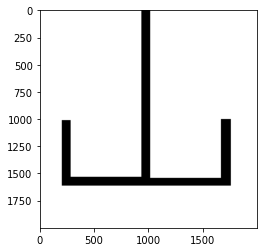

map_006_params.yaml


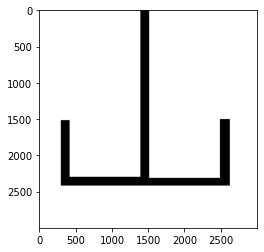

map_007_params.yaml


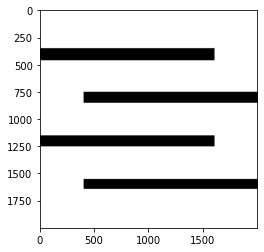

map_008_params.yaml


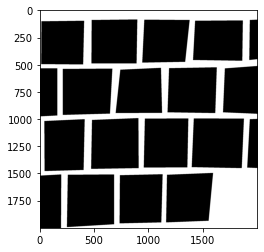

map_009_params.yaml


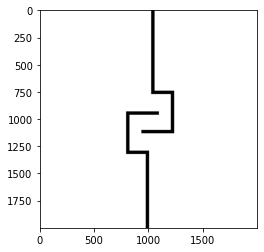

map_010_params.yaml


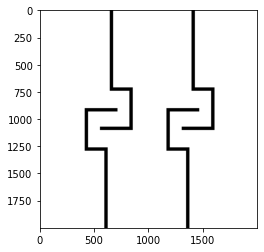

map_011_params.yaml


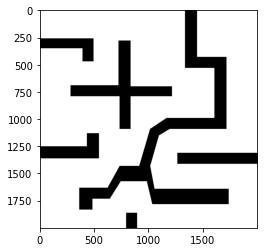

map_012_params.yaml


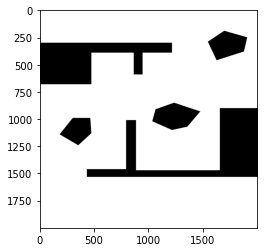

map_013_params.yaml


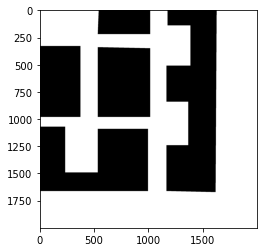

map_014_params.yaml


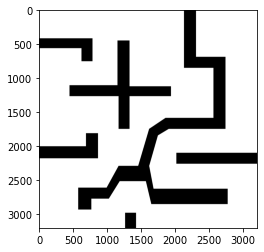

map_015_params.yaml


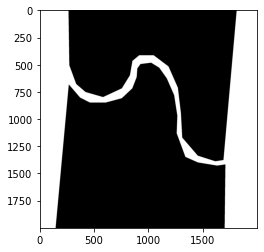

map_016_params.yaml


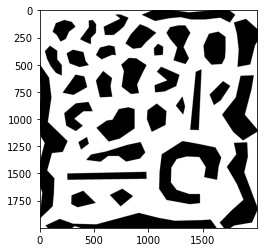

map_017_params.yaml


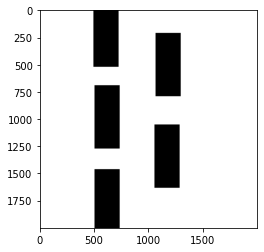

map_018_params.yaml


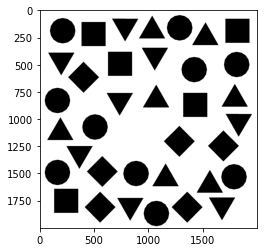

map_019_params.yaml


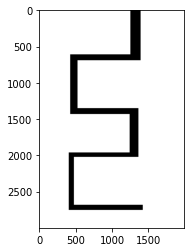

map_020_params.yaml


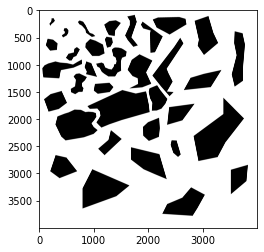

map_021_params.yaml


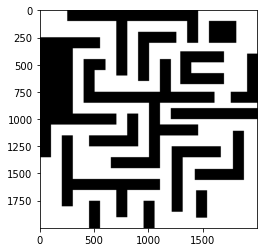

map_022_params.yaml


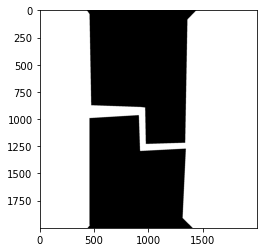

map_023_params.yaml


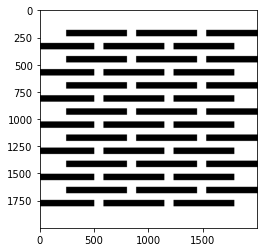

map_024_params.yaml


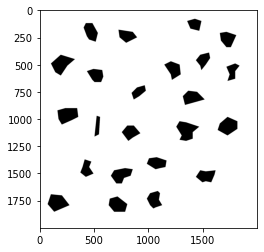

map_025_params.yaml


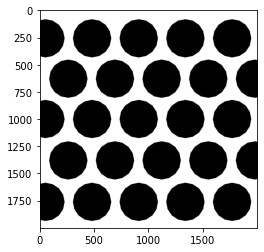

map_026_params.yaml


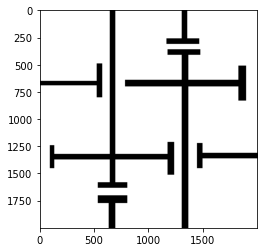

map_027_params.yaml


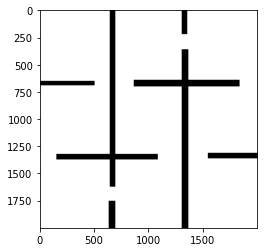

map_028_params.yaml


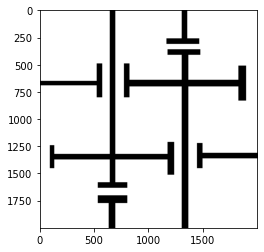

map_029_params.yaml


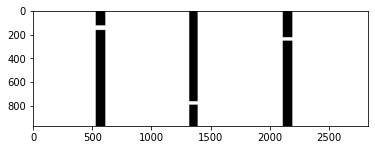

map_030_params.yaml


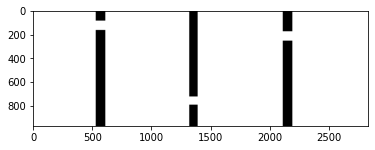

map_031_params.yaml


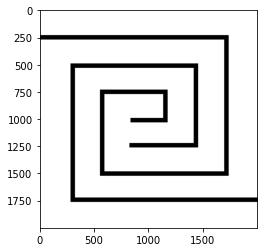

map_032_params.yaml


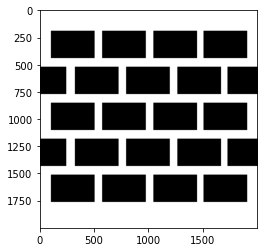

map_033_params.yaml


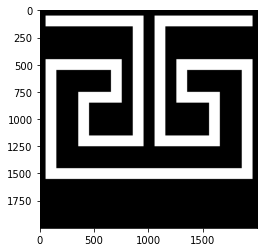

map_034_params.yaml


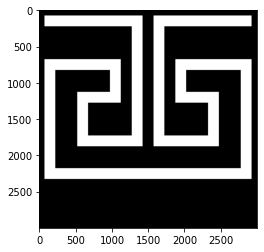

map_035_params.yaml


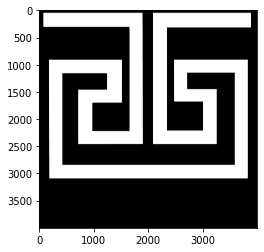

map_036_params.yaml


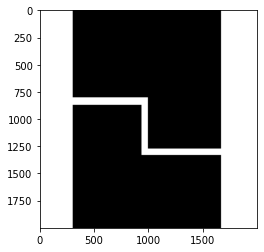

map_037_params.yaml


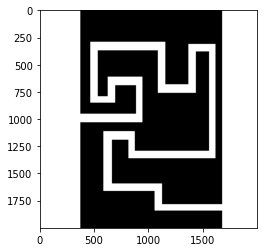

map_038_params.yaml


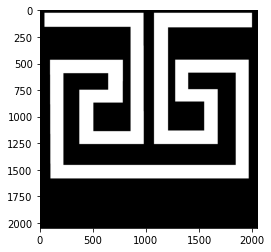

map_039_params.yaml


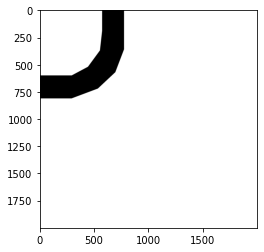

map_040_params.yaml


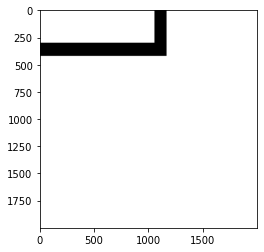

map_041_params.yaml


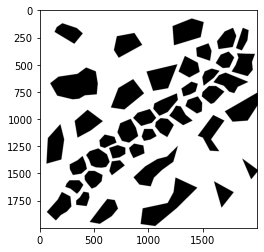

map_042_params.yaml


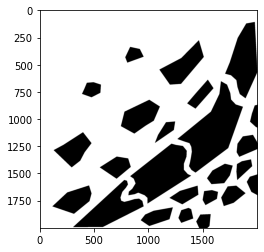

map_043_params.yaml


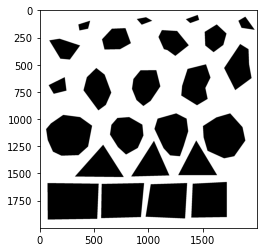

map_044_params.yaml


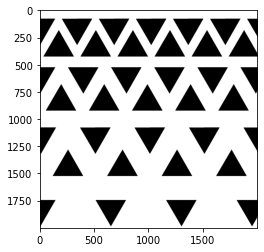

map_045_params.yaml


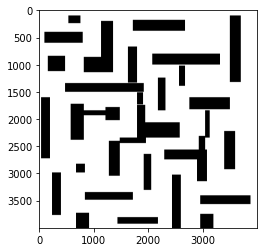

random_map_1_params.yaml


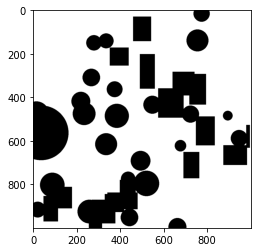

In [2]:
for file in os.listdir('map_params'):
    param_file = os.path.join('map_params', file)
    map_gen = MapGenerator(param_file)
    print(file)
    plt.imshow(map_gen.map.get_map(), cmap='gray')
    plt.show()

In [2]:
map_gen = MapGenerator('map_params/map_012_params.yaml')

(2000, 2000)


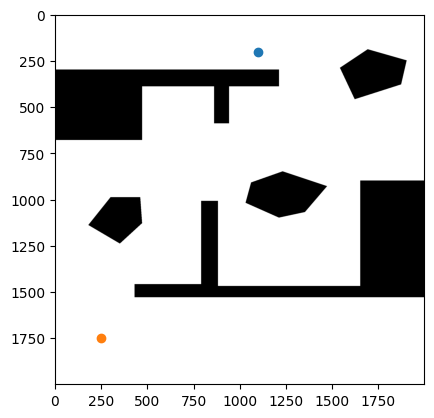

In [3]:
curr_map = map_gen.map.get_map()
start = np.array([1100, 200]).astype(np.int32)
end = np.array([250, 1750]).astype(np.int32)
plt.imshow(curr_map, cmap='gray')
plt.scatter([start[0]], [start[1]])
plt.scatter([end[0]], [end[1]])
print(curr_map.shape)
plt.show()

In [4]:
def cost_function(particles):
    global curr_map, start, end
    points = particles.reshape(-1, 2)
    points = (points * (np.array(curr_map.shape[::-1]) - 1)).astype(np.int32)
    path = linear_interpolation(start, end, points)
    cost = cost_func(path, curr_map, 2, 1)
    return cost

In [11]:
sols = list()
def test(x, y):
    print('Completed iteration', x+1)
    sols.append(y)

opt = PSOProblem(
    iteration_number=20,
    bees=20,
    particles=30,
    wolves=30,
    function=cost_function,
    points=4,
    iteration_callback=test,
    c_1=1.5,
    c_2=1.5,
    weight=0.5
)

In [12]:
best_sol = opt.solve()

Completed iteration 1
Completed iteration 2
Completed iteration 3
Completed iteration 4
Completed iteration 5
Completed iteration 6
Completed iteration 7
Completed iteration 8
Completed iteration 9
Completed iteration 10
Completed iteration 11
Completed iteration 12
Completed iteration 13
Completed iteration 14
Completed iteration 15
Completed iteration 16
Completed iteration 17
Completed iteration 18
Completed iteration 19
Completed iteration 20


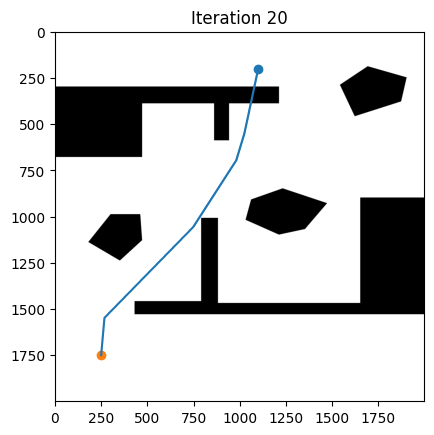

In [13]:
itr = 1
for sol in sols:
    points = sol.position.reshape(-1, 2)
    points = (points * (np.array(curr_map.shape[::-1]) - 1)).astype(np.int32)
    path = linear_interpolation(start, end, points)
    fig = plt.figure()
    plt.title('Iteration %d' % itr)
    plt.imshow(curr_map, cmap='gray')
    plt.scatter([start[0]], [start[1]])
    plt.scatter([end[0]], [end[1]])
    plt.plot(path[:, 0], path[:, 1])
    display(fig)
    clear_output(wait = True)
    plt.pause(0.01)
    clear_output(wait = True)
    itr += 1

In [14]:
best_sol.position

array([0.51283918, 0.27583574, 0.49089149, 0.34823379, 0.37432989,
       0.52901501, 0.13439815, 0.77442915])